<a href="https://colab.research.google.com/github/Sahil-Jagadale/ML_PRACTICALS/blob/main/Problem_Statement_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install apyori

In [31]:
import pandas as pd
import numpy as np
from apyori import apriori
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("Order1.csv")
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [12]:
data.shape

(38765, 3)

In [13]:
data.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [14]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [27]:
transaction = data.groupby(['Member_number','Date'])
transaction.count()

itemDescription
Member_number Date                       
1000          15-03-2015                4
              24-06-2014                3
              24-07-2015                2
              25-11-2015                2
              27-05-2015                2
...                                   ...
4999          24-01-2015                6
              26-12-2015                2
5000          09-03-2014                2
              10-02-2015                3
              16-11-2014                2

[14963 rows x 1 columns]

In [30]:
support = (data['itemDescription'].value_counts()/14963*100)
support.head()

whole milk          16.721246
other vegetables    12.684622
rolls/buns          11.468288
soda                10.118292
yogurt               8.915324
Name: itemDescription, dtype: float64

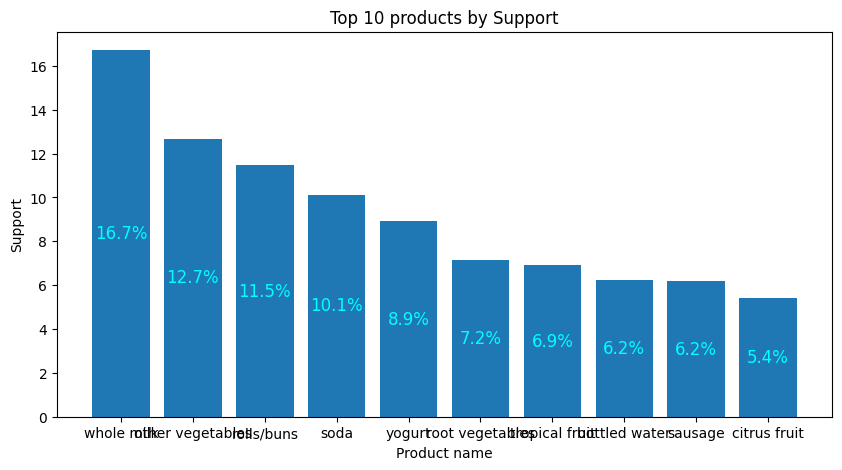

In [37]:
plt.figure(figsize=(10,5))
bars = plt.bar(x = np.arange(len(support.head(10))), height = (support).head(10))
plt.bar_label(bars, fontsize=12, color="cyan", fmt = '%2.1f%%', label_type="center")
plt.xticks(ticks= np.arange(len(support.head(10))), labels = support.index[:10])
plt.title("Top 10 products by Support")
plt.xlabel("Product name")
plt.ylabel("Support")
plt.show()

In [38]:
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transaction)]
list_transactions[:10]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream']]

In [51]:
rules = apriori(list_transactions, min_support=0.001, min_confidence=0.05, min_lift = 1.2, max_length=2)
result = list(rules)

In [52]:
print(len(result))

28


In [55]:
for item in result:
  pair=item[0]
  items=[x for x in pair]
  print("Rule "+ items[0] +"-> "+ items[1])
  print("Support: "+ str(item[1]))
  print("Confidence: "+ str(item[2][0][2]))
  print("Lift: "+ str(item[2][0][3]))
  print("_____________________________________________")

Rule beverages-> sausage
Support: 0.0015371249081066632
Confidence: 0.09274193548387098
Lift: 1.5367636551995143
_____________________________________________
Rule bottled beer-> sausage
Support: 0.003341575887188398
Confidence: 0.07374631268436578
Lift: 1.2220000849348451
_____________________________________________
Rule sugar-> bottled water
Support: 0.0014702933903628951
Confidence: 0.0830188679245283
Lift: 1.368074141800349
_____________________________________________
Rule brown bread-> canned beer
Support: 0.0024059346387756467
Confidence: 0.06394316163410303
Lift: 1.3629366489046777
_____________________________________________
Rule candy-> citrus fruit
Support: 0.0010024727661565194
Confidence: 0.06976744186046512
Lift: 1.3131197893813076
_____________________________________________
Rule white bread-> canned beer
Support: 0.0015371249081066632
Confidence: 0.06406685236768803
Lift: 1.3655730939853503
_____________________________________________
Rule cat food-> tropical fruit
